# Artificial neural networks


Good hidden layer sizes:
- 2
- 5
- 8 2
- 32 16
- 16 16 16 

Based on https://github.com/vincenzorrei/EDU-ArtificialNeuralNetworks

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV

from imblearn.over_sampling import SMOTENC

import pickle

import src.features as features
import src.model_selection as model_selection 
import src.functions as functions
import src.datasets as datasets 

In [4]:
### Load dataset
data = datasets.data_original()
### Feature engineering 
data = features.engineer(data)
### Train test split (unprocessed)
X_, y_ = data.drop('infected', axis=1), data['infected']
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size = 0.2, random_state=42, stratify = y_)


### Scaling the data 

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_)
X_test_scaled = scaler.transform(X_test_)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train_.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test_.columns)

In [6]:
X_train = X_train_scaled
X_test = X_test_scaled
y_train = y_train_
y_test = y_test_

## Multilayer Perceptrons with Scikit-learn

In [7]:
from sklearn.neural_network import MLPClassifier


### Define and train the model

In [17]:

# Define the model
model = MLPClassifier(hidden_layer_sizes=(128, 128, 128), activation='logistic', solver='adam', max_iter=200, verbose = True)

# Fit the model
model.fit(X_train, y_train)

Iteration 1, loss = 0.61516069
Iteration 2, loss = 0.56704067
Iteration 3, loss = 0.55454334
Iteration 4, loss = 0.55454819
Iteration 5, loss = 0.55009912
Iteration 6, loss = 0.54755315
Iteration 7, loss = 0.54226915
Iteration 8, loss = 0.53488227
Iteration 9, loss = 0.52325654
Iteration 10, loss = 0.50646118
Iteration 11, loss = 0.48429738
Iteration 12, loss = 0.45849433
Iteration 13, loss = 0.43256159
Iteration 14, loss = 0.40749256
Iteration 15, loss = 0.38706219
Iteration 16, loss = 0.37060902
Iteration 17, loss = 0.35777758
Iteration 18, loss = 0.34713350
Iteration 19, loss = 0.33710762
Iteration 20, loss = 0.32808509
Iteration 21, loss = 0.31898422
Iteration 22, loss = 0.31450584
Iteration 23, loss = 0.30650516
Iteration 24, loss = 0.29675827
Iteration 25, loss = 0.29029657
Iteration 26, loss = 0.28326645
Iteration 27, loss = 0.27767917
Iteration 28, loss = 0.27065104
Iteration 29, loss = 0.26547437
Iteration 30, loss = 0.26165863
Iteration 31, loss = 0.26077715
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(128, 128, 128),
              verbose=True)

### Evaluate the MLP classifier

In [22]:
y_pred = model.predict(X_test)

results_test_mlp = {
    "model": "mlp 128 128 128",
    "accuracy": accuracy_score(y_test,y_pred),
    "recall": recall_score(y_test,y_pred),
    "selectivity": recall_score(y_test,y_pred,pos_label = 0),
    "f1": f1_score(y_test,y_pred),
    "f3": fbeta_score(y_test,y_pred,beta = 3),
    "precision": precision_score(y_test,y_pred),
    "NPV": precision_score(y_test,y_pred, pos_label = 0)
}

pd.DataFrame([results_test_mlp])

,model,accuracy,recall,selectivity,f1,f3,precision,NPV
0,mlp 128 128 128,0.913551,0.740385,0.969136,0.806283,0.752688,0.885057,0.920821


## Train on oversampled data

### Oversampling train data 

In [83]:
# identify categorical features 
# The dataset does not have categorical features with more than 4 categories
cat_features = [c for c in X_train_.columns if X_train_[c].nunique() < 5]

In [84]:
smote_nc = SMOTENC(categorical_features=cat_features, sampling_strategy=1.0, random_state=42)
X_train_oversampled, y_train_oversampled = smote_nc.fit_resample(X_train_, y_train_) 

### Scaling the data 

In [96]:
scaler = StandardScaler()

scaler.fit(X_train_)

X_train_scaled_oversampled = scaler.transform(X_train_oversampled)
X_test_scaled = scaler.transform(X_test_)

### Data ready for Machine Learning

In [28]:
X_train =pd.DataFrame(X_train_scaled_oversampled,columns=X_.columns)
X_test =pd.DataFrame(X_test_scaled,columns=X_.columns)
y_train = y_train_oversampled 
y_test = y_test_ 

### Train the MLP model

In [39]:

# Define the model
model = MLPClassifier(hidden_layer_sizes=(128, 128, 128), activation='logistic', solver='adam', max_iter=200, verbose = True)

# Fit the model
history = model.fit(X_train, y_train)

Iteration 1, loss = 0.69519893
Iteration 2, loss = 0.68931457
Iteration 3, loss = 0.67901228
Iteration 4, loss = 0.64436125
Iteration 5, loss = 0.56413990
Iteration 6, loss = 0.46499139
Iteration 7, loss = 0.40426257
Iteration 8, loss = 0.36940668
Iteration 9, loss = 0.34536524
Iteration 10, loss = 0.32510226
Iteration 11, loss = 0.30224159
Iteration 12, loss = 0.28776092
Iteration 13, loss = 0.27553420
Iteration 14, loss = 0.26859732
Iteration 15, loss = 0.25531461
Iteration 16, loss = 0.25170545
Iteration 17, loss = 0.24373470
Iteration 18, loss = 0.23901836
Iteration 19, loss = 0.23805574
Iteration 20, loss = 0.23769522
Iteration 21, loss = 0.23695337
Iteration 22, loss = 0.23945921
Iteration 23, loss = 0.23566681
Iteration 24, loss = 0.23355417
Iteration 25, loss = 0.23120328
Iteration 26, loss = 0.23002371
Iteration 27, loss = 0.23106313
Iteration 28, loss = 0.23010443
Iteration 29, loss = 0.23157799
Iteration 30, loss = 0.23215236
Iteration 31, loss = 0.23097724
Iteration 32, los

### Loss curve


<Axes: >

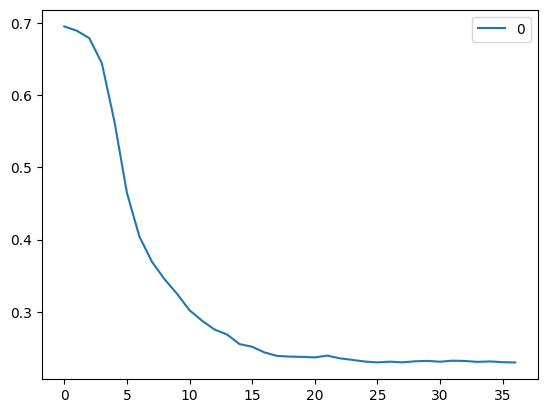

In [40]:
pd.DataFrame(model.loss_curve_).plot()


### Evaluate the MLP classifier

In [30]:
y_pred = model.predict(X_test)

results_test_mlp = {
    "model": "mlp 128 128 128 oversampled",
    "accuracy": accuracy_score(y_test,y_pred),
    "recall": recall_score(y_test,y_pred),
    "selectivity": recall_score(y_test,y_pred,pos_label = 0),
    "f1": f1_score(y_test,y_pred),
    "f3": fbeta_score(y_test,y_pred,beta = 3),
    "precision": precision_score(y_test,y_pred),
    "NPV": precision_score(y_test,y_pred, pos_label = 0)
}

pd.DataFrame([results_test_mlp])

,model,accuracy,recall,selectivity,f1,f3,precision,NPV
0,mlp 128 128 128,0.878505,0.817308,0.898148,0.765766,0.806452,0.720339,0.93871


### Save the model


In [38]:
import pickle

In [41]:
filename = "models/neural_network_dense-128-128-128_on_oversampled.pkl"
#with open(filename,"wb") as file:
    #pickle.dump(model, file)

## GridSearchCV hidden layer numbers

In [2]:
X_train = X_train_scaled
X_test = X_test_scaled
y_train = y_train_
y_test = y_test_

NameError: name 'X_train_scaled' is not defined

### One layer

In [16]:
grid_params_one = {
    'hidden_layer_sizes'  : [
        (2,), 
        (8,), 
        (11,),
        (16,),
        (22,),
        (32,),
        (64,),
        (128,)
    ],
    'activation' : ["logistic", "relu"],
    'solver' : ["adam"],
    'max_iter' : [1000],
    'random_state' : [42]
}

In [17]:
grid = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid= grid_params_one,
    scoring = "accuracy",
    cv = 3,
    verbose = 1
)

In [18]:
#fit on not oversampled data
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't 

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(2,), (8,), (11,), (16,), (22,),
                                                (32,), (64,), (128,)],
                         'max_iter': [1000], 'solver': ['adam']},
             scoring='accuracy', verbose=1)

In [20]:
grid.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (2,),
 'max_iter': 1000,
 'solver': 'adam'}

In [19]:
grid.best_score_

np.float64(0.8988928831126269)

In [56]:
grid_one = grid
sizes = [param['hidden_layer_sizes'] for param in grid_one.cv_results_['params']]
results_one = pd.DataFrame(
    zip(sizes,grid_one.cv_results_['mean_test_score']), 
    columns = ["sizes","score"])
results_one.sort_values(by="score")

,sizes,score
13,"(32,)",0.848041
14,"(64,)",0.851553
12,"(22,)",0.852138
10,"(11,)",0.862665
15,"(128,)",0.863240
11,"(16,)",0.863825
7,"(128,)",0.870841
9,"(8,)",0.872011
6,"(64,)",0.877860
5,"(32,)",0.879610


In [21]:
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print("MLP one layer. accuracy", accuracy, "recall", recall)

MLP one layer. accuracy 0.9042056074766355 recall 0.7403846153846154


### Two layers

In [70]:
grid_params_two = {
    'hidden_layer_sizes'  : [
        (22,22), 
        (16,16), 
        (32,32),
        (32,16),
        (16,8),
        (32,8),
        (64,32),
        (128,128),
        (8,2)
    ],
    'activation' : ["logistic", "relu"],
    'solver' : ["adam"],
    'max_iter' : [1000],
    'random_state' : [42]
}

In [71]:
grid_two = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid= grid_params_two,
    scoring = "accuracy",
    cv = 3,
    verbose = 1
)

In [72]:
#fit on not oversampled data
grid_two.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't 

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(22, 22), (16, 16), (32, 32),
                                                (32, 16), (16, 8), (32, 8),
                                                (64, 32), (128, 128), (8, 2)],
                         'max_iter': [1000], 'random_state': [42],
                         'solver': ['adam']},
             scoring='accuracy', verbose=1)

In [73]:
grid_two.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (8, 2),
 'max_iter': 1000,
 'random_state': 42,
 'solver': 'adam'}

In [74]:
grid_two.best_score_

np.float64(0.8819491811841337)

In [75]:
sizes = [param['hidden_layer_sizes'] for param in grid_two.cv_results_['params']]
results_two = pd.DataFrame(
    zip(sizes,grid_two.cv_results_['mean_test_score']), 
    columns = ["sizes","score"])
results_two.sort_values(by="score")

,sizes,score
13,"(16, 8)",0.844528
9,"(22, 22)",0.849214
6,"(64, 32)",0.849803
7,"(128, 128)",0.852135
10,"(16, 16)",0.852715
16,"(128, 128)",0.852715
0,"(22, 22)",0.853311
3,"(32, 16)",0.855061
12,"(32, 16)",0.857387
14,"(32, 8)",0.859144


In [76]:
y_pred = grid_two.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print("MLP two layers. accuracy", accuracy, "recall", recall)

MLP two layers. accuracy 0.9042056074766355 recall 0.7307692307692307


Better was (32,16) trained up to 200 iterations

### Three layers

In [28]:
grid_params_three = {
    'hidden_layer_sizes'  : [
        (16,8,4), 
        (32,16,8), 
        (16,16,16),
        (44,32,16),
        (8,4,2),
        (4,4,2),
        (128,32,8),
        (128,128,128),
        (32,32,8)
    ],
    'activation' : ["logistic", "relu"],
    'solver' : ["adam"],
    'max_iter' : [200],
    'random_state' : [42]
}

In [29]:
grid_three = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid= grid_params_three,
    scoring = "accuracy",
    cv = 3,
    verbose = 1
)

In [30]:
#fit on not oversampled data
grid_three.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(16, 8, 4), (32, 16, 8),
                                                (16, 16, 16), (44, 32, 16),
                                                (8, 4, 2), (4, 4, 2),
                                                (128, 32, 8), (128, 128, 128),
                                                (32, 32, 8)],
                         'max_iter': [200], 'random_state': [42],
                         'solver': ['adam']},
             scoring='accuracy', verbose=1)

In [31]:
grid_three.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (16, 16, 16),
 'max_iter': 200,
 'random_state': 42,
 'solver': 'adam'}

In [32]:
grid_three.best_score_

np.float64(0.8953933286221977)

In [54]:
sizes = [param['hidden_layer_sizes'] for param in grid_three.cv_results_['params']]
results_three = pd.DataFrame(
    zip(sizes,grid_three.cv_results_['mean_test_score']), 
    columns = ["sizes","score"])
results_three.sort_values(by="score")

,sizes,score
5,"(4, 4, 2)",0.756283
4,"(8, 4, 2)",0.756283
17,"(32, 32, 8)",0.850384
11,"(16, 16, 16)",0.853307
12,"(44, 32, 16)",0.853889
15,"(128, 32, 8)",0.855642
16,"(128, 128, 128)",0.856222
10,"(32, 16, 8)",0.860314
9,"(16, 8, 4)",0.869087
14,"(4, 4, 2)",0.873759


In [33]:
y_pred = grid_three.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print("MLP one layer. accuracy", accuracy, "recall", recall)

MLP one layer. accuracy 0.9135514018691588 recall 0.7692307692307693


### Deep layers

In [42]:
grid_params_deep = {
    'hidden_layer_sizes'  : [
        (2,2,2,2),
        (16,16,16,16),
        (16,16,16,16,16),
        (16,32,16,8,4),
        (2,2,2,2,2,2),
        (4,4,4,4,2),
        (32,16,8,4,2),
        (16,8,4,2),
        (8,8,4,4,2,2),
        (128,8,2,2,2,2,2,2,2,2,),
        (4,4,4,4,4,4,4,4)
    ],
    'activation' : ["logistic"],
    'solver' : ["adam"],
    'max_iter' : [500],
    'random_state' : [42]
}

In [43]:
grid_deep = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid= grid_params_deep,
    scoring = "accuracy",
    cv = 3,
    verbose = 1
)

In [44]:
#fit on not oversampled data
grid_deep.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic'],
                         'hidden_layer_sizes': [(2, 2, 2, 2), (16, 16, 16, 16),
                                                (16, 16, 16, 16, 16),
                                                (16, 32, 16, 8, 4),
                                                (2, 2, 2, 2, 2, 2),
                                                (4, 4, 4, 4, 2),
                                                (32, 16, 8, 4, 2),
                                                (16, 8, 4, 2),
                                                (8, 8, 4, 4, 2, 2),
                                                (128, 8, 2, 2, 2, 2, 2, 2, 2,
                                                 2),
                                                (4, 4, 4, 4, 4, 4, 4, 4)],
                         'max_iter': [500], 'random_state': [42],
                         'solver': ['adam']},
             scoring='accuracy', verbose=1)

In [45]:
grid_deep.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (16, 16, 16, 16),
 'max_iter': 500,
 'random_state': 42,
 'solver': 'adam'}

In [46]:
grid_deep.best_score_

np.float64(0.8702594197109822)

In [47]:
y_pred = grid_deep.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print("MLP deep layers. accuracy", accuracy, "recall", recall)

MLP deep layers. accuracy 0.9018691588785047 recall 0.7884615384615384


### More with 1 layer

In [57]:
grid_params_one_plus = {
    'hidden_layer_sizes'  : [
        (2,), 
        (3,), 
        (4,),
        (5,),
        (6,),
        (7,),
    ],
    'activation' : ["logistic"],
    'solver' : ["adam"],
    'max_iter' : [1000],
    'random_state' : [42]
}

In [58]:
grid_one_plus = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid= grid_params_one_plus,
    scoring = "accuracy",
    cv = 5,
    verbose = 1
)

In [59]:
#fit on not oversampled data
grid_one_plus.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic'],
                         'hidden_layer_sizes': [(2,), (3,), (4,), (5,), (6,),
                                                (7,)],
                         'max_iter': [1000], 'random_state': [42],
                         'solver': ['adam']},
             scoring='accuracy', verbose=1)

In [60]:
grid_one_plus.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (5,),
 'max_iter': 1000,
 'random_state': 42,
 'solver': 'adam'}

In [61]:
grid_one_plus.best_score_

np.float64(0.9006598127972995)

In [62]:
sizes = [param['hidden_layer_sizes'] for param in grid_one_plus.cv_results_['params']]
results_one_plus = pd.DataFrame(
    zip(sizes,grid_one_plus.cv_results_['mean_test_score']), 
    columns = ["sizes","score"])
results_one_plus.sort_values(by="score")

,sizes,score
2,"(4,)",0.894815
4,"(6,)",0.896570
5,"(7,)",0.897151
1,"(3,)",0.897736
0,"(2,)",0.900658
3,"(5,)",0.900660


In [64]:
grid_one_plus.cv_results_['mean_test_score']

array([0.90065811, 0.89773584, 0.89481527, 0.90065981, 0.89656966,
       0.89715104])

In [67]:
mlp_2 = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='adam', max_iter=1000, verbose = True)
mlp_2.fit(X_train_scaled,y_train)
y_pred = mlp_2.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print("MLP deep layers. accuracy", accuracy, "recall", recall)

Iteration 1, loss = 0.72202114
Iteration 2, loss = 0.71515467
Iteration 3, loss = 0.70836519
Iteration 4, loss = 0.70146479
Iteration 5, loss = 0.69482455
Iteration 6, loss = 0.68807729
Iteration 7, loss = 0.68133676
Iteration 8, loss = 0.67475175
Iteration 9, loss = 0.66815325
Iteration 10, loss = 0.66172444
Iteration 11, loss = 0.65527539
Iteration 12, loss = 0.64895108
Iteration 13, loss = 0.64265636
Iteration 14, loss = 0.63659205
Iteration 15, loss = 0.63046446
Iteration 16, loss = 0.62447844
Iteration 17, loss = 0.61872336
Iteration 18, loss = 0.61305408
Iteration 19, loss = 0.60746134
Iteration 20, loss = 0.60203255
Iteration 21, loss = 0.59667211
Iteration 22, loss = 0.59153331
Iteration 23, loss = 0.58644221
Iteration 24, loss = 0.58152125
Iteration 25, loss = 0.57675306
Iteration 26, loss = 0.57201021
Iteration 27, loss = 0.56747810
Iteration 28, loss = 0.56294203
Iteration 29, loss = 0.55859951
Iteration 30, loss = 0.55432913
Iteration 31, loss = 0.55016625
Iteration 32, los

In [69]:
mlp_5 = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', solver='adam', max_iter=1000, verbose = True)
mlp_5.fit(X_train_scaled,y_train)
y_pred = mlp_5.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print("MLP deep layers. accuracy", accuracy, "recall", recall)

Iteration 1, loss = 0.73310601
Iteration 2, loss = 0.72121029
Iteration 3, loss = 0.70974163
Iteration 4, loss = 0.69860732
Iteration 5, loss = 0.68783004
Iteration 6, loss = 0.67743683
Iteration 7, loss = 0.66756809
Iteration 8, loss = 0.65787510
Iteration 9, loss = 0.64856766
Iteration 10, loss = 0.63962984
Iteration 11, loss = 0.63094157
Iteration 12, loss = 0.62279127
Iteration 13, loss = 0.61475998
Iteration 14, loss = 0.60703314
Iteration 15, loss = 0.59965784
Iteration 16, loss = 0.59253073
Iteration 17, loss = 0.58562328
Iteration 18, loss = 0.57912965
Iteration 19, loss = 0.57266765
Iteration 20, loss = 0.56651896
Iteration 21, loss = 0.56058455
Iteration 22, loss = 0.55495736
Iteration 23, loss = 0.54946592
Iteration 24, loss = 0.54423664
Iteration 25, loss = 0.53917367
Iteration 26, loss = 0.53440135
Iteration 27, loss = 0.52958753
Iteration 28, loss = 0.52509353
Iteration 29, loss = 0.52069733
Iteration 30, loss = 0.51645555
Iteration 31, loss = 0.51238921
Iteration 32, los

### One layer with oversampling

In [77]:
grid_params_one_plus = {
    'hidden_layer_sizes'  : [
        (2,), 
        (3,), 
        (4,),
        (5,),
        (6,),
        (7,),
    ],
    'activation' : ["logistic"],
    'solver' : ["adam"],
    'max_iter' : [1000],
    'random_state' : [42]
}

In [78]:
from imblearn.pipeline import Pipeline, make_pipeline

In [79]:
type(MLPClassifier())

sklearn.neural_network._multilayer_perceptron.MLPClassifier

In [81]:
prefix = 'mlpclassifier__'
grid_imba_params_one = {prefix + key : value for key,value in grid_params_one_plus.items()}

In [85]:
grid_one_imba = GridSearchCV(
    estimator=make_pipeline(smote_nc,MLPClassifier()),
    param_grid= grid_imba_params_one,
    scoring = "accuracy",
    cv = 5,
    verbose = 1
)

In [86]:
#fit on not oversampled data
grid_one_imba.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smotenc',
                                        SMOTENC(categorical_features=['hemo',
                                                                      'homo',
                                                                      'drugs',
                                                                      'karnof',
                                                                      'oprior',
                                                                      'z30',
                                                                      'race',
                                                                      'gender',
                                                                      'str2',
                                                                      'strat',
                                                                      'symptom',
                                                                      'offtrt',
                                                                      'trt0',
                                                                      'trt1',
                                                                      'trt2'],
                                                random_state=42,
                                                sampling_strategy=1.0)),
                                       ('mlpclassifier', MLPClassifier())]),
             param_grid={'mlpclassifier__activation': ['logistic'],
                         'mlpclassifier__hidden_layer_sizes': [(2,), (3,), (4,),
                                                               (5,), (6,),
                                                               (7,)],
                         'mlpclassifier__max_iter': [1000],
                         'mlpclassifier__random_state': [42],
                         'mlpclassifier__solver': ['adam']},
             scoring='accuracy', verbose=1)

In [90]:
grid_one_imba.best_params_

{'mlpclassifier__activation': 'logistic',
 'mlpclassifier__hidden_layer_sizes': (3,),
 'mlpclassifier__max_iter': 1000,
 'mlpclassifier__random_state': 42,
 'mlpclassifier__solver': 'adam'}

In [91]:
grid_one_imba.best_score_

np.float64(0.8807938212879136)

In [93]:
sizes = [param['mlpclassifier__hidden_layer_sizes'] for param in grid_one_imba.cv_results_['params']]
results_one_imba = pd.DataFrame(
    zip(sizes,grid_one_imba.cv_results_['mean_test_score']), 
    columns = ["sizes","score"])
results_one_imba.sort_values(by="score")

,sizes,score
4,"(6,)",0.873191
0,"(2,)",0.874949
2,"(4,)",0.875529
5,"(7,)",0.877865
3,"(5,)",0.880209
1,"(3,)",0.880794


In [94]:
grid_one_imba.cv_results_['mean_test_score']

array([0.87494928, 0.88079382, 0.87552896, 0.88020903, 0.87319148,
       0.87786473])

In [97]:
mlp_3 = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='adam', max_iter=1000, verbose = True)
mlp_3.fit(X_train_scaled_oversampled,y_train_oversampled)
y_pred = mlp_3.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print("MLP deep layers. accuracy", accuracy, "recall", recall)

Iteration 1, loss = 0.66587411
Iteration 2, loss = 0.66187813
Iteration 3, loss = 0.65794369
Iteration 4, loss = 0.65407376
Iteration 5, loss = 0.65013714
Iteration 6, loss = 0.64625546
Iteration 7, loss = 0.64235918
Iteration 8, loss = 0.63850876
Iteration 9, loss = 0.63466107
Iteration 10, loss = 0.63079927
Iteration 11, loss = 0.62705541
Iteration 12, loss = 0.62316856
Iteration 13, loss = 0.61941976
Iteration 14, loss = 0.61564101
Iteration 15, loss = 0.61193202
Iteration 16, loss = 0.60819279
Iteration 17, loss = 0.60449445
Iteration 18, loss = 0.60080601
Iteration 19, loss = 0.59716448
Iteration 20, loss = 0.59356491
Iteration 21, loss = 0.58997108
Iteration 22, loss = 0.58639732
Iteration 23, loss = 0.58289153
Iteration 24, loss = 0.57937917
Iteration 25, loss = 0.57590474
Iteration 26, loss = 0.57243572
Iteration 27, loss = 0.56895606
Iteration 28, loss = 0.56557961
Iteration 29, loss = 0.56220555
Iteration 30, loss = 0.55884020
Iteration 31, loss = 0.55550548
Iteration 32, los

c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [98]:
mlp_5 = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic', solver='adam', max_iter=1000, verbose = True)
mlp_5.fit(X_train_scaled_oversampled,y_train_oversampled)
y_pred = mlp_5.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print("MLP deep layers. accuracy", accuracy, "recall", recall)

Iteration 1, loss = 0.75425644
Iteration 2, loss = 0.73903644
Iteration 3, loss = 0.72538161
Iteration 4, loss = 0.71269927
Iteration 5, loss = 0.70100548
Iteration 6, loss = 0.69061930
Iteration 7, loss = 0.68109797
Iteration 8, loss = 0.67229227
Iteration 9, loss = 0.66438311
Iteration 10, loss = 0.65694510
Iteration 11, loss = 0.64994211
Iteration 12, loss = 0.64330155
Iteration 13, loss = 0.63695520
Iteration 14, loss = 0.63091789
Iteration 15, loss = 0.62493255
Iteration 16, loss = 0.61898974
Iteration 17, loss = 0.61318653
Iteration 18, loss = 0.60740416
Iteration 19, loss = 0.60175593
Iteration 20, loss = 0.59606525
Iteration 21, loss = 0.59037662
Iteration 22, loss = 0.58474035
Iteration 23, loss = 0.57920960
Iteration 24, loss = 0.57363076
Iteration 25, loss = 0.56812413
Iteration 26, loss = 0.56255528
Iteration 27, loss = 0.55709870
Iteration 28, loss = 0.55166792
Iteration 29, loss = 0.54624639
Iteration 30, loss = 0.54082718
Iteration 31, loss = 0.53554764
Iteration 32, los

c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [ ]:
grid_params_one = {
    'hidden_layer_sizes'  : [
        (2,), 
        (3,), 
        (11,),
        (16,),
        (22,),
        (32,),
        (64,),
        (128,)
    ],
    'activation' : ["logistic"],
    'solver' : ["adam"],
    'max_iter' : [1000],
    'random_state' : [42]
}

In [ ]:
grid_ = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid= grid_params_one,
    scoring = "accuracy",
    cv = 3,
    verbose = 1
)

In [ ]:
#fit on not oversampled data
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\Projects\DHcode\ProgettoTeam2\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't 

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(2,), (8,), (11,), (16,), (22,),
                                                (32,), (64,), (128,)],
                         'max_iter': [1000], 'solver': ['adam']},
             scoring='accuracy', verbose=1)

In [ ]:
grid.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (2,),
 'max_iter': 1000,
 'solver': 'adam'}

In [ ]:
grid.best_score_

np.float64(0.8988928831126269)

In [ ]:
grid_one = grid
sizes = [param['hidden_layer_sizes'] for param in grid_one.cv_results_['params']]
results_one = pd.DataFrame(
    zip(sizes,grid_one.cv_results_['mean_test_score']), 
    columns = ["sizes","score"])
results_one.sort_values(by="score")

,sizes,score
13,"(32,)",0.848041
14,"(64,)",0.851553
12,"(22,)",0.852138
10,"(11,)",0.862665
15,"(128,)",0.863240
11,"(16,)",0.863825
7,"(128,)",0.870841
9,"(8,)",0.872011
6,"(64,)",0.877860
5,"(32,)",0.879610


## Tensorflow (not supported on Python 3.13)

In [1]:
"""
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
"""

ModuleNotFoundError: No module named 'tensorflow'